<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [118]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
data = pd.read_csv('mumbai_dataset.csv')
data.head()

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,4850000,720,Kharghar,bhk,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,4500000,600,Kharghar,rk,0,1,1,1,1,0,...,1,0,1,0,0,0,0,0,0,0
2,6700000,650,Kharghar,rk,0,1,1,1,1,0,...,1,0,1,0,0,0,0,0,0,0
3,4500000,650,Kharghar,rk,0,1,1,0,0,1,...,1,1,1,0,0,0,0,0,1,0
4,5000000,665,Kharghar,rk,0,1,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


## General Information


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7719 entries, 0 to 7718
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                7719 non-null   int64 
 1   Area                 7719 non-null   int64 
 2   Location             7719 non-null   object
 3   sizeRkorBhk          7717 non-null   object
 4   Num_of_bedrooms      7719 non-null   int64 
 5   Resale               7719 non-null   int64 
 6   MaintenanceStaff     7719 non-null   int64 
 7   Gymnasium            7719 non-null   int64 
 8   SwimmingPool         7719 non-null   int64 
 9   LandscapedGardens    7719 non-null   int64 
 10  JoggingTrack         7719 non-null   int64 
 11  RainWaterHarvesting  7719 non-null   int64 
 12  IndoorGames          7719 non-null   int64 
 13  ShoppingMall         7719 non-null   int64 
 14  Intercom             7719 non-null   int64 
 15  SportsFacility       7719 non-null   int64 
 16  ATM   

In [5]:
data['Location'].value_counts()

Location
Kharghar               681
Thane West             577
Mira Road East         481
Ulwe                   391
Nala Sopara            225
                      ... 
Sea Face                 1
Shiv Sagar Estate        1
Kulupwadi                1
Off Nepean Sea Road      1
Padle Gaon               1
Name: count, Length: 413, dtype: int64

In [6]:
for column in data.columns:
    print(column)
    print(data[column].value_counts())

Price
Price
8500000     129
8000000     116
4500000     109
11000000    108
7500000     107
           ... 
9450000       1
5637000       1
7209999       1
4140999       1
2465000       1
Name: count, Length: 977, dtype: int64
Area
Area
650     319
1050    178
600     165
1100    162
1150    120
       ... 
5460      1
6900      1
531       1
1601      1
435       1
Name: count, Length: 1140, dtype: int64
Location
Location
Kharghar               681
Thane West             577
Mira Road East         481
Ulwe                   391
Nala Sopara            225
                      ... 
Sea Face                 1
Shiv Sagar Estate        1
Kulupwadi                1
Off Nepean Sea Road      1
Padle Gaon               1
Name: count, Length: 413, dtype: int64
sizeRkorBhk
sizeRkorBhk
bhk    3935
rk     3782
Name: count, dtype: int64
Num_of_bedrooms
Num_of_bedrooms
0    3764
2    2056
3    1389
1     233
4     225
5      43
6       8
7       1
Name: count, dtype: int64
Resale
Resale
1    4995
0

## Data Cleaning and Feature Engineering

In [7]:
data = data.drop(['Resale','MaintenanceStaff','Gymnasium','SwimmingPool','LandscapedGardens','JoggingTrack','RainWaterHarvesting','IndoorGames','ShoppingMall','Intercom','SportsFacility','ATM','ClubHouse','School','24X7Security','PowerBackup','StaffQuarter','Cafeteria','MultipurposeRoom','Hospital','WashingMachine','AC','Wifi','LiftAvailable','BED','VaastuCompliant','Microwave','GolfCourse','TV','DiningTable','Sofa','Wardrobe','Refrigerator','Childrensplayarea'],axis='columns')
data.head(8)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection
0,4850000,720,Kharghar,bhk,1,1,1,0
1,4500000,600,Kharghar,rk,0,1,1,0
2,6700000,650,Kharghar,rk,0,1,1,0
3,4500000,650,Kharghar,rk,0,1,1,0
4,5000000,665,Kharghar,rk,0,1,1,0
5,17000000,2000,Kharghar,bhk,4,4,1,0
6,12500000,1550,Kharghar,bhk,3,3,1,1
7,10500000,1370,Sector-13 Kharghar,bhk,3,3,1,0


In [8]:
data.isnull().sum()

Price               0
Area                0
Location            0
sizeRkorBhk         2
Num_of_bedrooms     0
Num_of_bathrooms    0
CarParking          0
Gasconnection       0
dtype: int64

In [9]:
data=data.dropna()
data.isnull().sum()

Price               0
Area                0
Location            0
sizeRkorBhk         0
Num_of_bedrooms     0
Num_of_bathrooms    0
CarParking          0
Gasconnection       0
dtype: int64

In [10]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [11]:
data[~data['Area'].apply(is_float)].head(10)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection


In [12]:
def convert_sqft_to_num(x):
    tokens= x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
# data['Area']=data['Area'].apply(convert_sqft_to_num)

In [13]:
data['price_per_sqft']=data['Price']/data['Area']
data.head(7)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
0,4850000,720,Kharghar,bhk,1,1,1,0,6736.111111
1,4500000,600,Kharghar,rk,0,1,1,0,7500.000000
2,6700000,650,Kharghar,rk,0,1,1,0,10307.692308
3,4500000,650,Kharghar,rk,0,1,1,0,6923.076923
4,5000000,665,Kharghar,rk,0,1,1,0,7518.796992
5,17000000,2000,Kharghar,bhk,4,4,1,0,8500.000000
6,12500000,1550,Kharghar,bhk,3,3,1,1,8064.516129


In [14]:
data.Location = data.Location.apply(lambda x:x.strip())
Location_stats = data.groupby('Location')['Location'].agg('count').sort_values(ascending = False)
Location_stats

Location
Kharghar                 681
Thane West               576
Mira Road East           481
Ulwe                     391
Nala Sopara              225
                        ... 
Ramdev Park                1
Rawal Pada                 1
Rustomjee Global City      1
Sahkar Nagar               1
worli sea face             1
Name: Location, Length: 413, dtype: int64

In [15]:
len(Location_stats[Location_stats <= 10])

312

In [16]:
Location_stats_less_than_10 = Location_stats[Location_stats <= 10]
Location_stats_less_than_10

Location
Rajendra Nagar           10
Kalamboli                10
Prabhadevi               10
Sector 10                10
Mumbai Central           10
                         ..
Ramdev Park               1
Rawal Pada                1
Rustomjee Global City     1
Sahkar Nagar              1
worli sea face            1
Name: Location, Length: 312, dtype: int64

In [17]:
data.Location = data.Location.apply(lambda x:'other' if x in Location_stats_less_than_10 else x)
len(data.Location.unique())

102

In [18]:
data.head(8)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
0,4850000,720,Kharghar,bhk,1,1,1,0,6736.111111
1,4500000,600,Kharghar,rk,0,1,1,0,7500.000000
2,6700000,650,Kharghar,rk,0,1,1,0,10307.692308
3,4500000,650,Kharghar,rk,0,1,1,0,6923.076923
4,5000000,665,Kharghar,rk,0,1,1,0,7518.796992
5,17000000,2000,Kharghar,bhk,4,4,1,0,8500.000000
6,12500000,1550,Kharghar,bhk,3,3,1,1,8064.516129
7,10500000,1370,other,bhk,3,3,1,0,7664.233577


In [19]:
data[data.Area/data.Num_of_bedrooms < 300].head()

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,price_per_sqft
2000,260000000,1165,other,bhk,4,4,1,1,223175.965665
2065,260000000,1165,other,bhk,4,4,1,1,223175.965665
3624,3500000,586,Andheri West,rk,2,2,0,0,5972.696246
5406,5700000,901,Mira Road East,bhk,4,4,1,1,6326.304107


In [20]:
data.shape

(7717, 9)

In [21]:
data = data[~(data.Area / data.Num_of_bedrooms < 300)]
data.shape

(7713, 9)

In [22]:
data.price_per_sqft.describe()

count      7713.000000
mean      16120.418053
std       19298.449729
min         460.526316
25%        6461.538462
50%       10410.094637
75%       18723.994452
max      400000.000000
Name: price_per_sqft, dtype: float64

In [23]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st))&(subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

data = remove_pps_outliers(data)
data.shape

(6785, 9)

In [24]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for Location,Location_df in df.groupby('Location'):
        Num_of_bedrooms_stats = {}
        for Num_of_bedrooms,Num_of_bedrooms_df in Location_df.groupby('Num_of_bedrooms'):
            Num_of_bedrooms_stats[Num_of_bedrooms]={
                'mean':np.mean(Num_of_bedrooms_df.price_per_sqft),
                'std':np.std(Num_of_bedrooms_df.price_per_sqft),
                'count':Num_of_bedrooms_df.shape[0]
            }
    for Num_of_bedrooms,Num_of_bedrooms_df in df.groupby('Num_of_bedrooms'):
        stats = Num_of_bedrooms_stats.get(Num_of_bedrooms-1)
        if stats and stats['count']>5:
            exclude_indices = np.append(exclude_indices,Num_of_bedrooms_df[
                Num_of_bedrooms_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')          
        
data = remove_bhk_outliers(data)
data.shape

(4509, 9)

In [25]:
#Remove bathrooms outlier 
data = data[data.Num_of_bathrooms < data.Num_of_bedrooms+2]
data.shape

(4508, 9)

In [26]:
data.shape

(4508, 9)

### Here is the summary of all the steps taken in Data Preprocessing and Feature Engineering

- Removing unnecessary and useless data columns
- Treating Missing Values
- Making a new feature 'price_per_sqft' for better interpretation purposes and outlier analysis.
- Introducing a new class Others for colum Location which groups all the Locations with 10 or less entries to their name.
- Removing the outliers where total Area / Number of Bedrooms < 300.
- Removing outliers based on price per sqft, number of bedrooms and number of bathrooms.


## EDA

### Average Price by Location

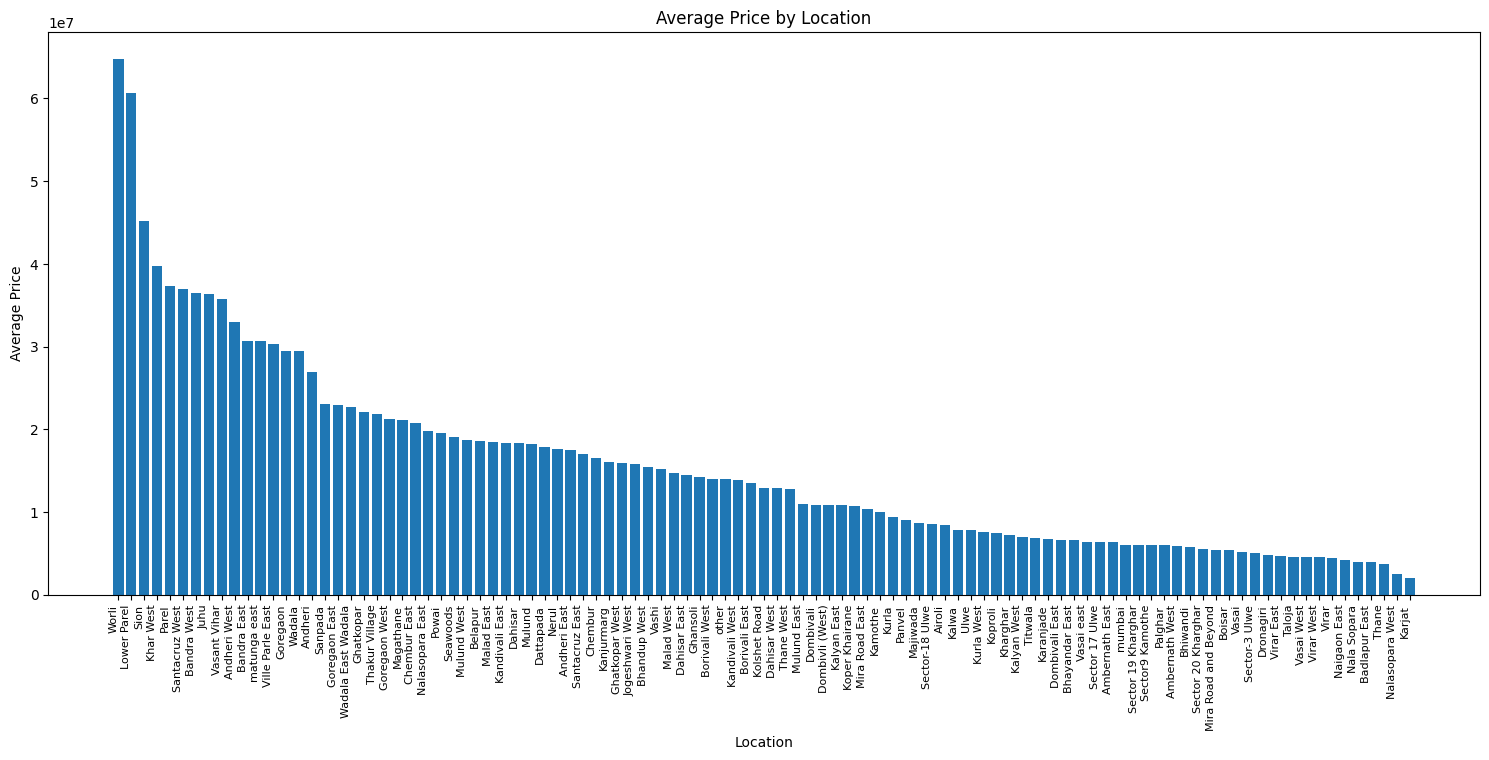

In [27]:

# Calculate average price by location
average_price_by_location = data.groupby('Location')['Price'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(15, 8))
bar_plot = plt.bar(average_price_by_location.index, average_price_by_location)

# Customize the plot
plt.xlabel('Location')
plt.ylabel('Average Price')
plt.title('Average Price by Location')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Make the plot scrollable horizontally
plt.subplots_adjust(bottom=0.25)
plt.xticks(fontsize=8)
plt.show()


### Distribution of prices

C:\Users\Vansh\AppData\Local\Temp\ipykernel_16820\626138514.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data['Price'], fill=True, palette='viridis', alpha=0.7)


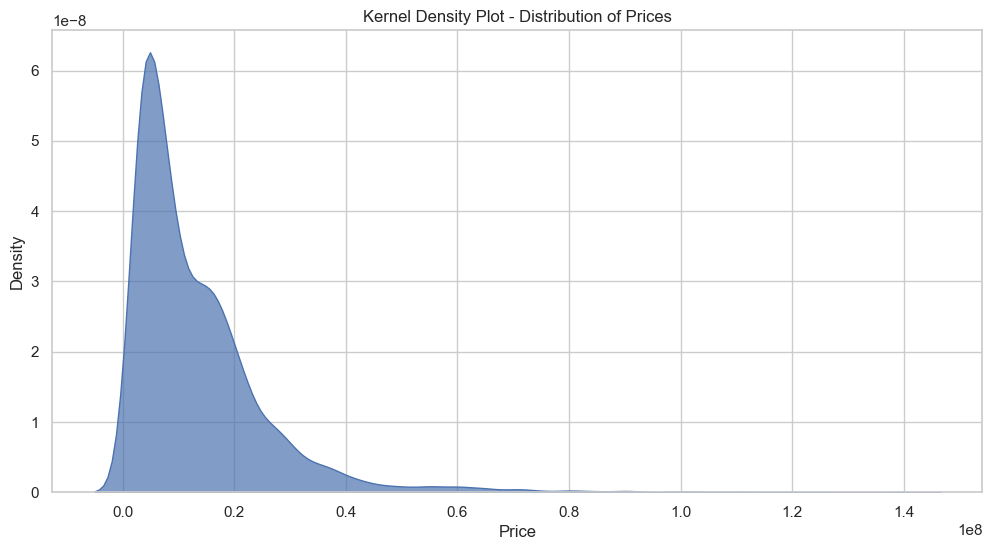

In [28]:
sns.set(style="whitegrid")

# Plotting KDE for the distribution of prices
plt.figure(figsize=(12, 6))
sns.kdeplot(data['Price'], fill=True, palette='viridis', alpha=0.7)

# Customize the plot
plt.title('Kernel Density Plot - Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Density')

plt.show()

### Price vs Area Scatter Plot

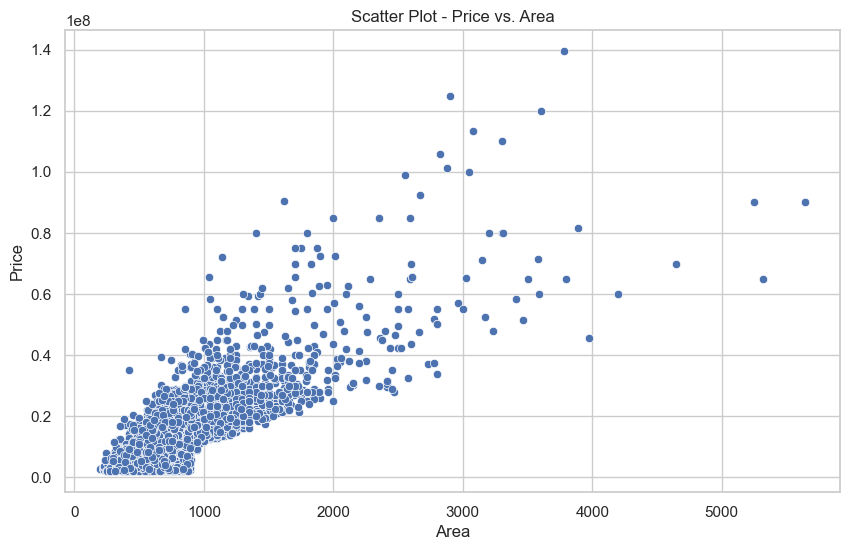

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=data)
plt.title('Scatter Plot - Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Box Plot Price Per Square Foot

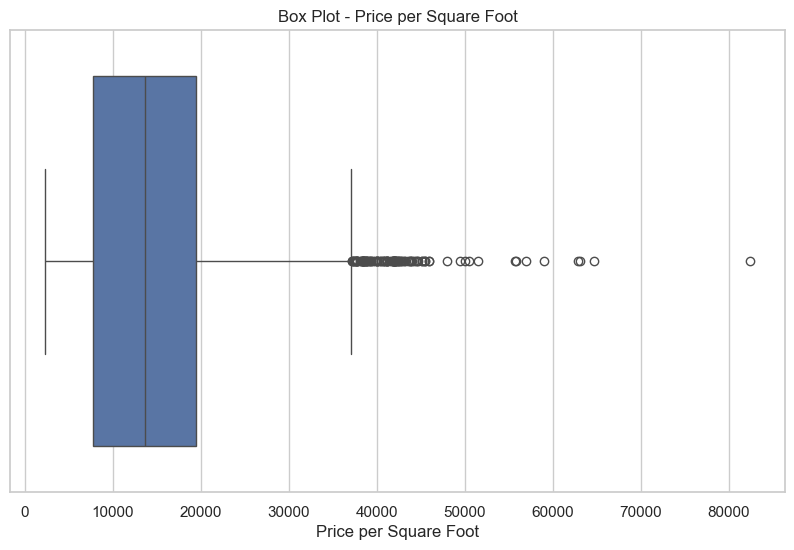

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_per_sqft', data=data)
plt.title('Box Plot - Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.show()

### Pair Plot of Numeric Features

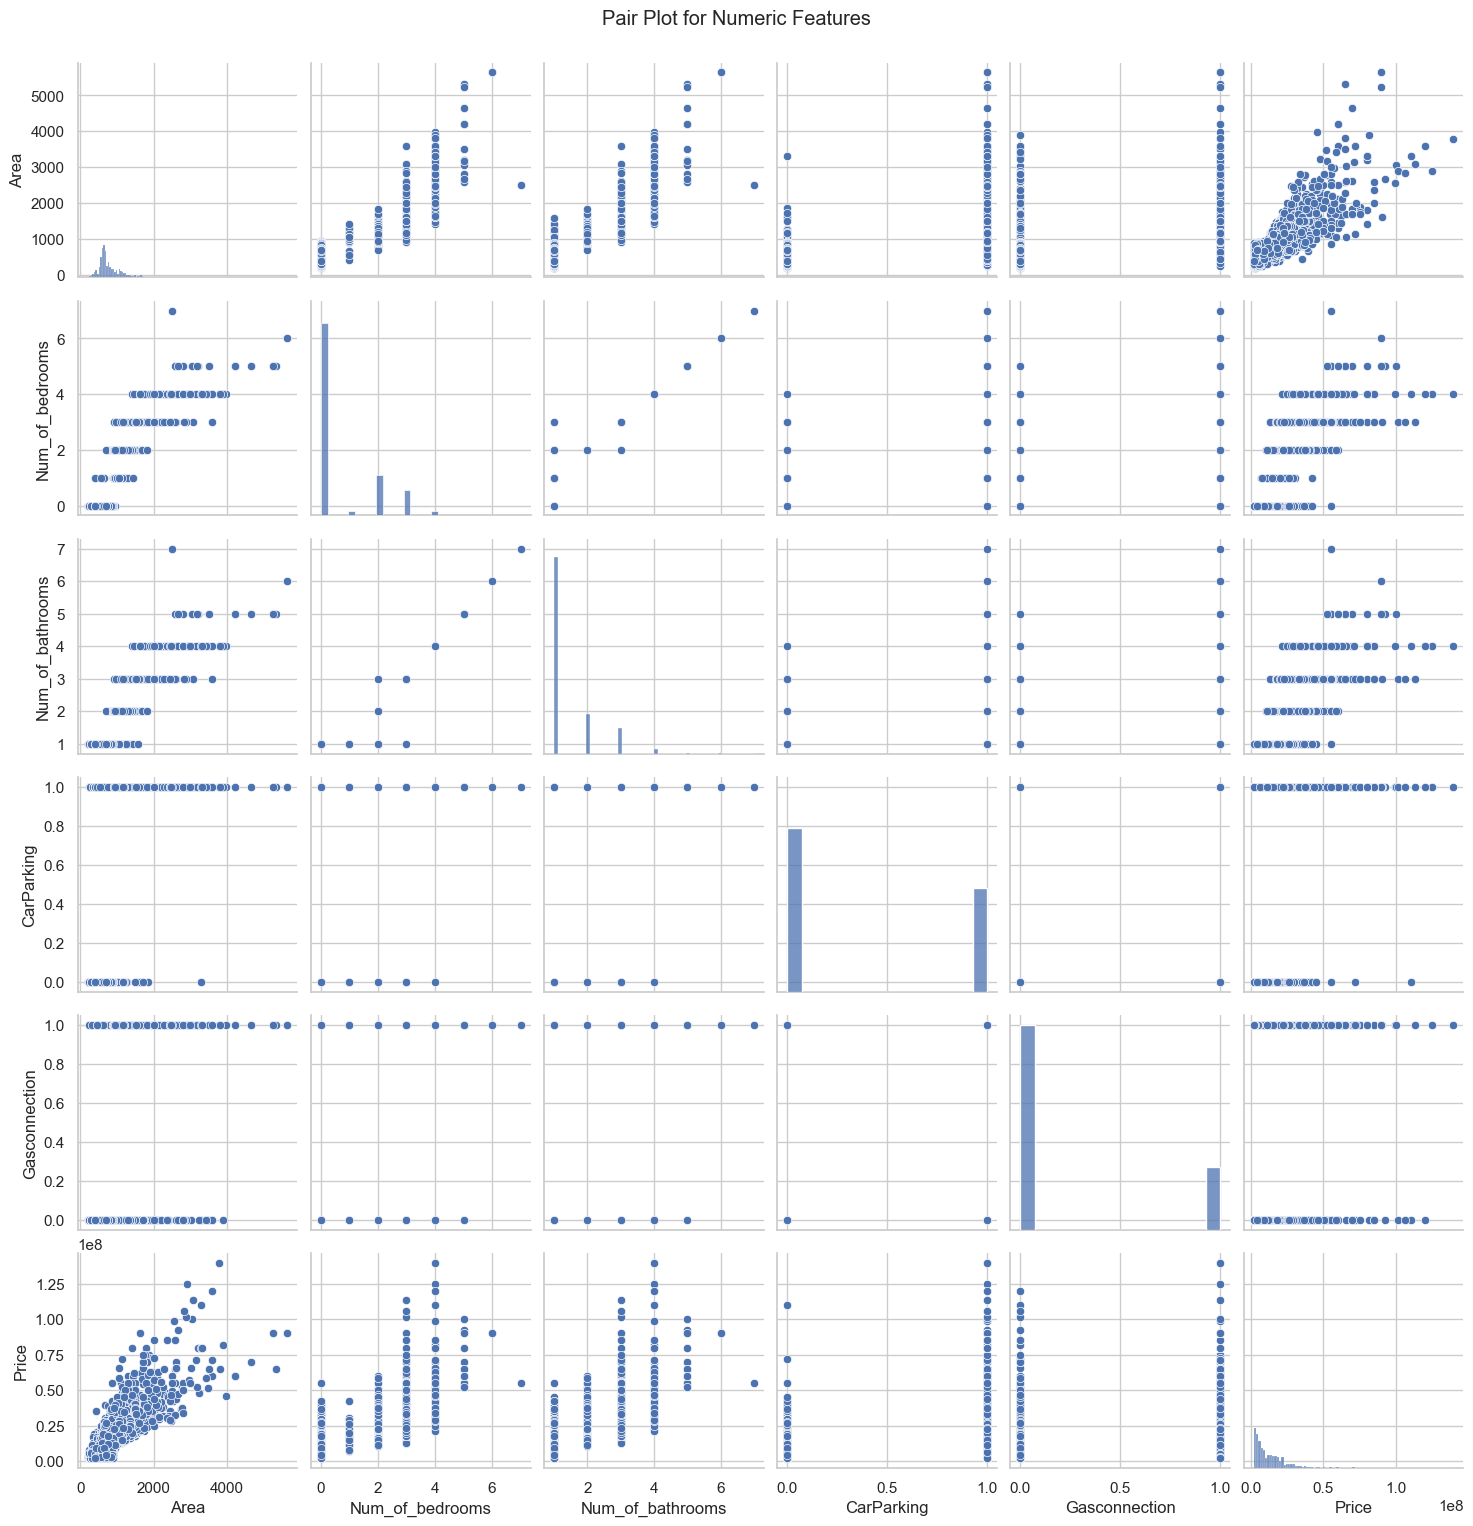

In [33]:
sns.pairplot(data[['Area', 'Num_of_bedrooms', 'Num_of_bathrooms', 'CarParking', 'Gasconnection', 'Price']])
plt.suptitle('Pair Plot for Numeric Features', y=1.02)
plt.show()

In [34]:
data = data.drop(['price_per_sqft'],axis='columns')
data.head(5)

,Price,Area,Location,sizeRkorBhk,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection
0,6200000,400,Airoli,rk,0,1,1,0
2,14900000,1245,Airoli,bhk,2,2,1,1
3,14000000,1183,Airoli,bhk,2,2,1,0
5,6400000,495,Airoli,rk,0,1,0,0
6,3800000,495,Airoli,rk,0,1,0,0


# 2. Objectives


## Introduction

- We are performing House Prices prediction for different Suburbs in Mumbai city and interpretation of features available in our dataset to find out which features have more affect on House Prices most.


## Objectives

- This Project will give a better understanding and insights on what factors drive up or down the House Prices in Mumbai City, while also provide us with models to predict house prices in Mumbai in future, allowing stakeholders such as homebuyers, sellers, and real estate professionals to make informed decisions.
- This also demonstrates the difference in various scores between different types of Models like Simple Linear Regression and with Regularization techniques applied.

## Scope of Analysis

- This analysis focuses on Interpretation and Prediction of Mumbai House Price from the provided Dataset, considering data on Area, Location, Num of bedrooms, Num of bathrooms, CarParking, Gasconnection and (BHK or RK).

## Approach

- Initial data Exploration.
- Unnecessary and useless Features are Removed along with Data Preprocessing, Cleaning and Necessary Feature Engineering.
- Exploratory Data Analysis on dataset.
- Application of Various Encoding Techniques on Location and sizeRkorBhk columns to make them suitable for modelling.
- Modelling using 4 diffrent techniques. 1.) simple Linear Regression, 2.) Lasso L1 Regularization Regression, 3.) Ridge L2 Regularization Regression, 4.) Elastic Net Regression. 
- Finding out and concluding which model provides best accuracy performs well on metrics such as R2_score.
- Listing down all the Interpretations and Key takeaways from the project.
- Discussing about Next steps to be taken.

## Expected Outcomes

# 3. Linear Regression Models


In [35]:
data['sizeRkorBhk'].unique()

array(['rk', 'bhk'], dtype=object)

In [36]:
data = pd.get_dummies(data, columns=['sizeRkorBhk'], prefix='size' ,dtype=int)
data

,Price,Area,Location,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,size_bhk,size_rk
0,6200000,400,Airoli,0,1,1,0,0,1
2,14900000,1245,Airoli,2,2,1,1,1,0
3,14000000,1183,Airoli,2,2,1,0,1,0
5,6400000,495,Airoli,0,1,0,0,0,1
6,3800000,495,Airoli,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
6774,4999000,710,other,0,1,0,0,0,1
6776,55000000,3000,other,4,4,1,1,1,0
6777,5350000,695,other,0,1,0,0,0,1
6779,9000000,650,other,0,1,0,0,0,1


In [37]:
data['Location'].unique()

array(['Airoli', 'Ambernath East', 'Ambernath West', 'Andheri',
       'Andheri East', 'Andheri West', 'Badlapur East', 'Bandra East',
       'Bandra West', 'Belapur', 'Bhandup West', 'Bhayandar East',
       'Bhiwandi', 'Boisar', 'Borivali East', 'Borivali West', 'Chembur',
       'Chembur East', 'Dahisar', 'Dahisar East', 'Dahisar West',
       'Dattapada', 'Dombivali', 'Dombivali East', 'Dombivli (West)',
       'Dronagiri', 'Ghansoli', 'Ghatkopar', 'Ghatkopar West', 'Goregaon',
       'Goregaon East', 'Goregaon West', 'Jogeshwari West', 'Juhu',
       'Kalwa', 'Kalyan East', 'Kalyan West', 'Kamothe', 'Kandivali East',
       'Kandivali West', 'Kanjurmarg', 'Karanjade', 'Karjat', 'Khar West',
       'Kharghar', 'Kolshet Road', 'Koper Khairane', 'Koproli', 'Kurla',
       'Kurla West', 'Lower Parel', 'Magathane', 'Majiwada', 'Malad East',
       'Malad West', 'Mira Road East', 'Mira Road and Beyond', 'Mulund',
       'Mulund East', 'Mulund West', 'Naigaon East', 'Nala Sopara',
      

In [38]:
label_encoder = LabelEncoder()
data['Location_e'] = label_encoder.fit_transform(data['Location'])
data=data.drop('Location',axis=1)

### Correlation Analysis

In [40]:
correlation_matrix=data.corr()
correlation_matrix

,Price,Area,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,size_bhk,size_rk,Location_e
Price,1.000000,0.794050,0.743917,0.752450,0.459704,0.507902,0.655509,-0.655509,-0.064779
Area,0.794050,1.000000,0.831455,0.854465,0.538524,0.529615,0.712218,-0.712218,-0.036262
Num_of_bedrooms,0.743917,0.831455,1.000000,0.976946,0.713223,0.738394,0.938697,-0.938697,-0.039014
Num_of_bathrooms,0.752450,0.854465,0.976946,1.000000,0.647074,0.660518,0.849511,-0.849511,-0.034214
CarParking,0.459704,0.538524,0.713223,0.647074,1.000000,0.687818,0.760098,-0.760098,-0.010755
Gasconnection,0.507902,0.529615,0.738394,0.660518,0.687818,1.000000,0.801857,-0.801857,-0.051424
size_bhk,0.655509,0.712218,0.938697,0.849511,0.760098,0.801857,1.000000,-1.000000,-0.049195
size_rk,-0.655509,-0.712218,-0.938697,-0.849511,-0.760098,-0.801857,-1.000000,1.000000,0.049195
Location_e,-0.064779,-0.036262,-0.039014,-0.034214,-0.010755,-0.051424,-0.049195,0.049195,1.000000


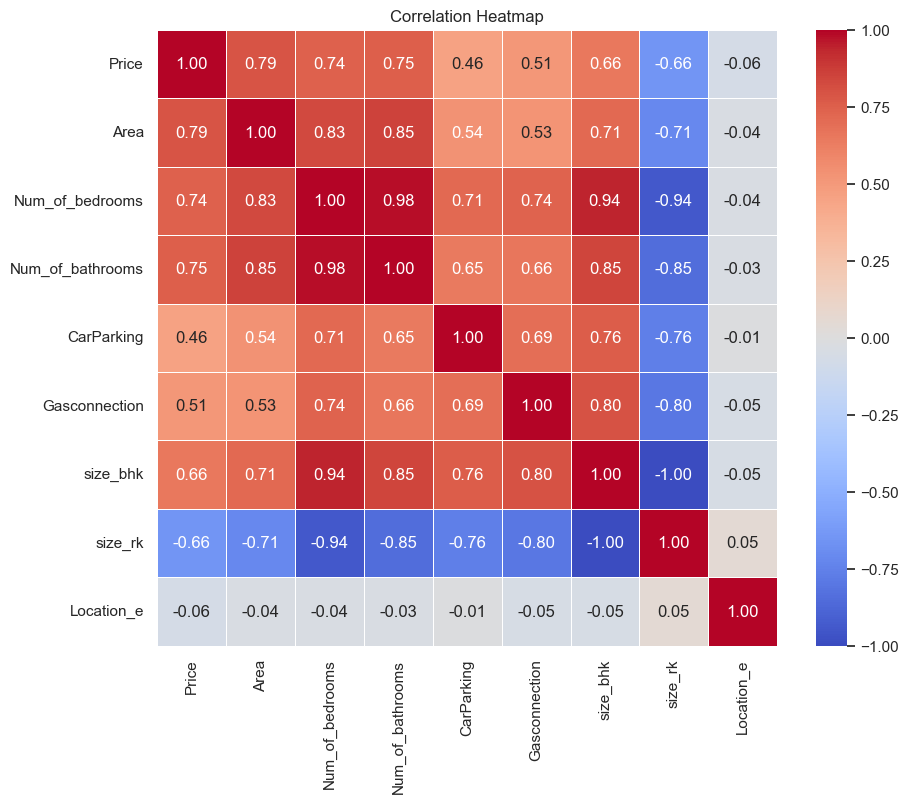

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Modelling

In [43]:
X=data.drop("Price",axis=1)
X

,Area,Num_of_bedrooms,Num_of_bathrooms,CarParking,Gasconnection,size_bhk,size_rk,Location_e
0,400,0,1,1,0,0,1,0
2,1245,2,2,1,1,1,0,0
3,1183,2,2,1,0,1,0,0
5,495,0,1,0,0,0,1,0
6,495,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
6774,710,0,1,0,0,0,1,100
6776,3000,4,4,1,1,1,0,100
6777,695,0,1,0,0,0,1,100
6779,650,0,1,0,0,0,1,100


In [44]:
y=data[['Price']]
y

,Price
0,6200000
2,14900000
3,14000000
5,6400000
6,3800000
...,...
6774,4999000
6776,55000000
6777,5350000
6779,9000000


In [45]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

## 1.) Simple Linear Regression

In [47]:
lr=LinearRegression()
lr.fit(X_train,y_train)
preds=lr.predict(X_test)
r2_score(y_test,preds)

0.6731849504762866

C:\Users\Vansh\AppData\Local\Temp\ipykernel_16820\4156269868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\Vansh\AppData\Local\Temp\ipykernel_16820\4156269868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

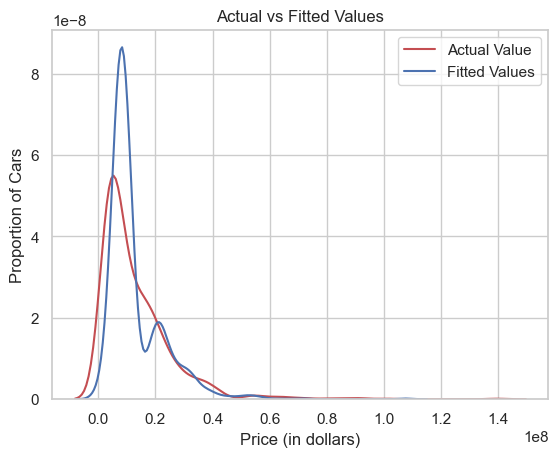

In [48]:
plot_dis(y_test,preds)

In [49]:
lr.coef_

array([[   15861.34828675,  4389946.11095512,  -854053.86906504,
        -2437028.03386408,  1430448.70175381,  -709584.99951059,
          709584.9995106 ,   -13386.35134452]])

[15861.348286749995, 4389946.110955121, -854053.8690650358, -2437028.0338640795, 1430448.7017538114, -709584.9995105936, 709584.999510601, -13386.351344524883]
['Area', 'Num_of_bedrooms', 'Num_of_bathrooms', 'CarParking', 'Gasconnection', 'size_bhk', 'size_rk', 'Location_e']


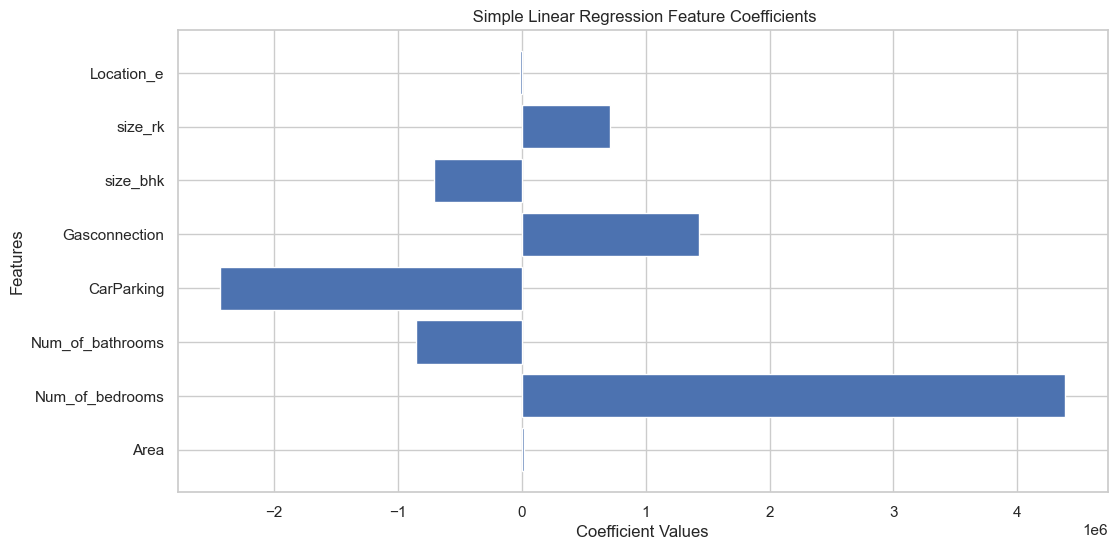

In [50]:
coefficients = list(lr.coef_[0])
feature_names = list(X.columns)
print(coefficients)
print(feature_names)
# Plotting
plt.figure(figsize=(12, 6))
plt.barh(feature_names, coefficients)  # Use barh for a horizontal bar chart
plt.xlabel('Coefficient Values')
plt.ylabel('Features')
plt.title(' Simple Linear Regression Feature Coefficients')
plt.show()

## 2.) Lasso Regularisation Regression with hyperparameter tuning using GridSearchCV

In [51]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
pipe_l1=Pipeline([
    ('poly',PolynomialFeatures()),
    ('ss',StandardScaler()),
    ('las',Lasso(max_iter=10000))
])


grid_params = {
    'poly__degree': [1, 2, 3, 4], 
    'las__alpha': np.geomspace(5e+4,65e+3,num=15), 
    'poly__interaction_only': [True, False],
    'poly__include_bias': [True, False]
}
grid_search = GridSearchCV(pipe_l1, grid_params, cv=kf)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best = grid_search.best_estimator_

# Make predictions on the test set
preds = best.predict(X_test)
r2_las=r2_score(y_test, preds )
print(r2_las)

Best Parameters: {'las__alpha': 55950.35798598196, 'poly__degree': 3, 'poly__include_bias': True, 'poly__interaction_only': False}
0.6886920535879812


In [52]:
print(r2_las)

0.6886920535879812


C:\Users\Vansh\AppData\Local\Temp\ipykernel_16820\4156269868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\Vansh\AppData\Local\Temp\ipykernel_16820\4156269868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

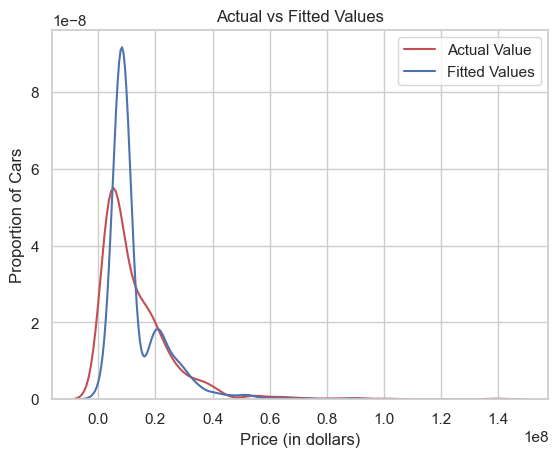

In [53]:
plot_dis(y_test,preds)

In [54]:
best.named_steps['las'].coef_

array([ 0.00000000e+00,  8.47766537e+06,  0.00000000e+00,  1.06781883e+06,
       -2.54186684e+05,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -1.97355077e+06,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.58475992e+04, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.75545904e+05, -0.00000000e+00,
        2.88986912e+04, -0.00000000e+00,  1.57608296e+06,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -1.94640899e+05,  0.00000000e+00,
       -1.85660297e+04, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -8.48589051e+05, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -1.60011214e+06,
       -0.00000000e+00, -

[0.0, 8477665.3700942, 0.0, 1067818.833782971, -254186.6839443952, 0.0, -0.0, 0.0, -1973550.77180297, 0.0, 0.0, 0.0, -0.0, 0.0, 15847.599202412912, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 175545.90352705322, -0.0, 28898.69121479419, -0.0, 1576082.961560512, 0.0, 0.0, -0.0, -194640.89925313852, 0.0, -18566.0296642411, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -848589.0514629823, -0.0, -0.0, -0.0, -0.0, 0.0, -1600112.1404200073, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -840517.3839933395, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -1271692.988816843, 0.0, 0.0, -0.0, -0.0, -377618.1543021385, 2509495.4891227363, 0.0, 0.0, -0.0, 0.0, 0.0, 963.9980685316544, -0.0, 0.0, -0.0, 0.0, 0.0, 4.2976172051023885e-10, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 66980.08731767988, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -93276.6377157253, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -61

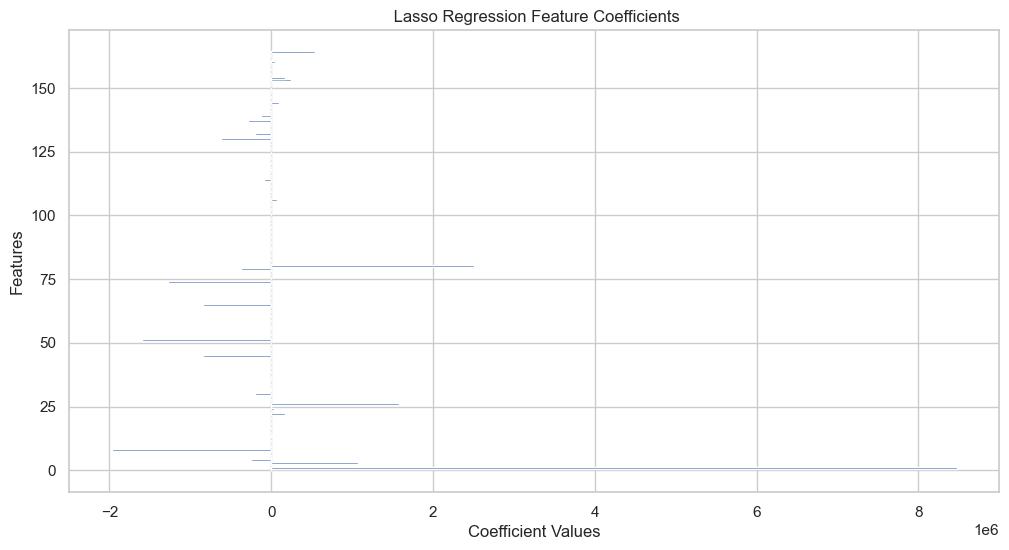

In [55]:
coefficients = list(best.named_steps['las'].coef_)
feature_names = list(np.linspace(0, 164, 165))
print(coefficients)
print(feature_names)
# Plotting
plt.figure(figsize=(12, 6))
plt.barh(feature_names, coefficients)  
plt.xlabel('Coefficient Values')
plt.ylabel('Features')
plt.title(' Lasso Regression Feature Coefficients')
plt.show()

## 3.) Ridge Regularisation Regression with hyperparameter tuning using GridSearchCV

In [56]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
pipe_l2=Pipeline([
    ('poly',PolynomialFeatures()),
    ('ss',StandardScaler()),
    ('rr',Ridge(max_iter=10000))
])


grid_params = {
    'poly__degree': [1, 2, 3, 4, 5], 
    'rr__alpha': np.geomspace(50,200,num=30),  # Generate logarithmic grid from 1e-9 to 1 with 10 points
    'poly__interaction_only': [True, False],
    'poly__include_bias': [True, False]
}
grid_search = GridSearchCV(pipe_l2, grid_params, cv=kf)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best = grid_search.best_estimator_

# Make predictions on the test set
preds = best.predict(X_test)
r2_rr=r2_score(y_test, preds )
r2_rr

Best Parameters: {'poly__degree': 3, 'poly__include_bias': True, 'poly__interaction_only': False, 'rr__alpha': 97.63817547182218}


0.690125995949709

In [57]:
print(r2_rr)

0.690125995949709


C:\Users\Vansh\AppData\Local\Temp\ipykernel_16820\4156269868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\Vansh\AppData\Local\Temp\ipykernel_16820\4156269868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

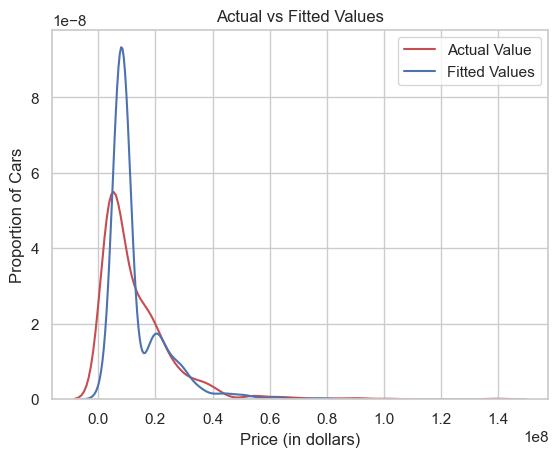

In [58]:
plot_dis(y_test,preds)

In [59]:
best.named_steps['rr'].coef_

array([[       0.        ,  2497114.49400666,   398574.73388236,
          576924.1117614 ,  -263607.03693212,   -37994.24139625,
         -136759.01881029,   136759.01881032, -1061087.26137517,
         1555961.56409341,   719516.64364958,   780153.19024882,
          576416.48696266,   652969.446152  ,  1623119.40301182,
           52717.3545398 ,    92546.5184132 ,   517161.85379006,
          500781.19726129,  -324574.58514635,   170922.18985152,
          388492.90605042,   184792.96951981,  -358023.09528767,
          543640.50880772,  -174200.65589654,   236607.49010451,
          325624.0550275 ,   131038.50077811,  -582908.2838552 ,
         -263607.03693214,  -138866.49555232,  -307648.37392844,
           29058.39775012,   -35119.84513215,   -37994.24139627,
          -12872.105544  ,   -83577.52481008,   -65388.04261393,
         -136759.01881027,        0.        ,  -565658.8828236 ,
          136759.0188103 ,  -412826.88896324,    81518.30344859,
         -755613.72403637

[       0.          2497114.49400666   398574.73388236   576924.1117614
  -263607.03693212   -37994.24139625  -136759.01881029   136759.01881032
 -1061087.26137517  1555961.56409341   719516.64364958   780153.19024882
   576416.48696266   652969.446152    1623119.40301182    52717.3545398
    92546.5184132    517161.85379006   500781.19726129  -324574.58514635
   170922.18985152   388492.90605042   184792.96951981  -358023.09528767
   543640.50880772  -174200.65589654   236607.49010451   325624.0550275
   131038.50077811  -582908.2838552   -263607.03693214  -138866.49555232
  -307648.37392844    29058.39775012   -35119.84513215   -37994.24139627
   -12872.105544     -83577.52481008   -65388.04261393  -136759.01881027
        0.          -565658.8828236    136759.0188103   -412826.88896324
    81518.30344859  -755613.72403637  -676920.3632523   -668024.9796394
  -297969.28213959 -1035519.62191707  1436154.2610193    206639.00332019
   823633.83604089  -515064.30556448  -504639.42417013 

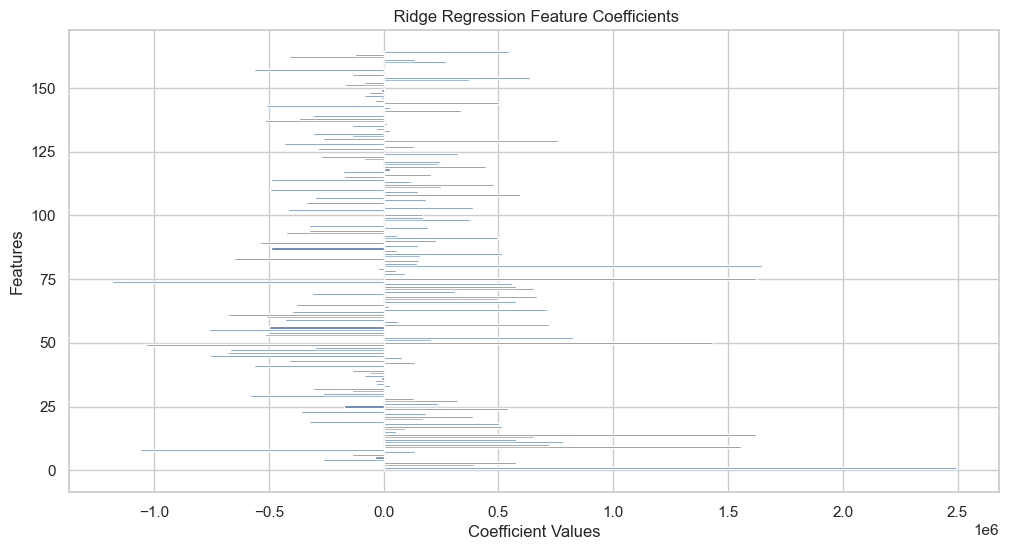

In [60]:
coefficients = best.named_steps['rr'].coef_.reshape(-1)
coefficients.shape
feature_names = list(np.linspace(0, 164, 165))
print(coefficients)
print(feature_names)
# Plotting
plt.figure(figsize=(12, 6))
plt.barh(feature_names, coefficients)  
plt.xlabel('Coefficient Values')
plt.ylabel('Features')
plt.title(' Ridge Regression Feature Coefficients')
plt.show()

## 4.) ElasticNet Regularisation Regression with hyperparameter tuning using GridSearchCV

In [61]:
kf = KFold(n_splits=3, shuffle=True, random_state=42)
pipe_l12=Pipeline([
    ('poly',PolynomialFeatures()),
    ('ss',StandardScaler()),
    ('en',ElasticNet(max_iter=10000))
])


grid_params = {
    'poly__degree': [1, 2, 3, 4], 
    'en__alpha': [0.01,0.1,1],
    'en__l1_ratio': [0.3, 0.5, 0.7, 0.9],  # You can adjust the values based on your needs
    'poly__interaction_only': [True, False],
    'poly__include_bias': [True, False]
}
grid_search = GridSearchCV(pipe_l12, grid_params, cv=kf)

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best = grid_search.best_estimator_

# Make predictions on the test set
preds = best.predict(X_test)
r2_en=r2_score(y_test, preds )
r2_en

C:\Users\Vansh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.822e+16, tolerance: 3.461e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\Vansh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.426e+16, tolerance: 3.843e+13
  model = cd_fast.enet_coordinate_descent(
C:\Users\Vansh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

Best Parameters: {'en__alpha': 0.1, 'en__l1_ratio': 0.7, 'poly__degree': 3, 'poly__include_bias': True, 'poly__interaction_only': False}


C:\Users\Vansh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.211e+16, tolerance: 5.603e+13
  model = cd_fast.enet_coordinate_descent(


0.6899710811061179

In [62]:
print(r2_en)

0.6899710811061179


C:\Users\Vansh\AppData\Local\Temp\ipykernel_16820\4156269868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\Vansh\AppData\Local\Temp\ipykernel_16820\4156269868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

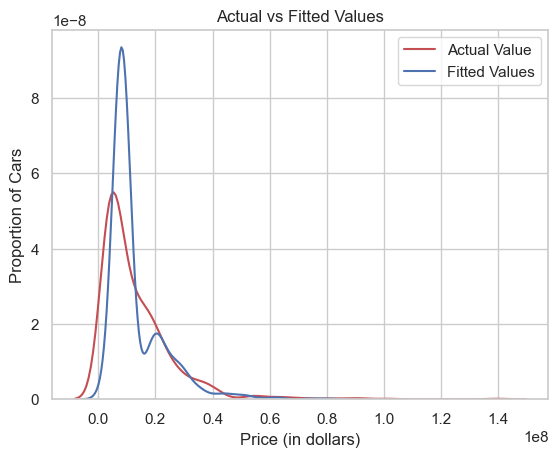

In [63]:
plot_dis(y_test,preds)

In [65]:
best.named_steps['en'].coef_

array([       0.        ,  2450146.12301882,   391645.95750341,
         573195.35677586,  -271898.03477679,   -37955.93684039,
        -129327.19510704,   130062.91781329, -1034775.90432249,
        1501654.33490853,   714950.14493864,   780000.51483189,
         558180.49725829,   618668.90919336,  1574525.24370516,
          78375.31985299,   119881.69000059,   489137.91098495,
         475471.72226336,  -328862.68364104,   155768.17617079,
         371134.71123157,   176190.11356201,  -357231.25952637,
         519569.73595634,  -190101.60286686,   218862.89641843,
         319026.02360937,   128702.67607694,  -576856.27089452,
        -274971.03232505,  -138806.51337153,  -317482.36466265,
          27943.99919819,   -55976.8724219 ,   -36945.43119243,
         -12772.94789547,   -76159.14430404,   -81516.85810621,
        -124712.02256641,        0.        ,  -540026.27025602,
         121988.70903672,  -413684.61979552,    86822.45530534,
        -749986.75860784,  -658765.53334

[       0.          2450146.12301882   391645.95750341   573195.35677586
  -271898.03477679   -37955.93684039  -129327.19510704   130062.91781329
 -1034775.90432249  1501654.33490853   714950.14493864   780000.51483189
   558180.49725829   618668.90919336  1574525.24370516    78375.31985299
   119881.69000059   489137.91098495   475471.72226336  -328862.68364104
   155768.17617079   371134.71123157   176190.11356201  -357231.25952637
   519569.73595634  -190101.60286686   218862.89641843   319026.02360937
   128702.67607694  -576856.27089452  -274971.03232505  -138806.51337153
  -317482.36466265    27943.99919819   -55976.8724219    -36945.43119243
   -12772.94789547   -76159.14430404   -81516.85810621  -124712.02256641
        0.          -540026.27025602   121988.70903672  -413684.61979552
    86822.45530534  -749986.75860784  -658765.53334873  -649714.00771442
  -268573.90883144 -1010311.28910883  1385653.41926456   217568.56980246
   740488.23203866  -490714.83792619  -480327.68587

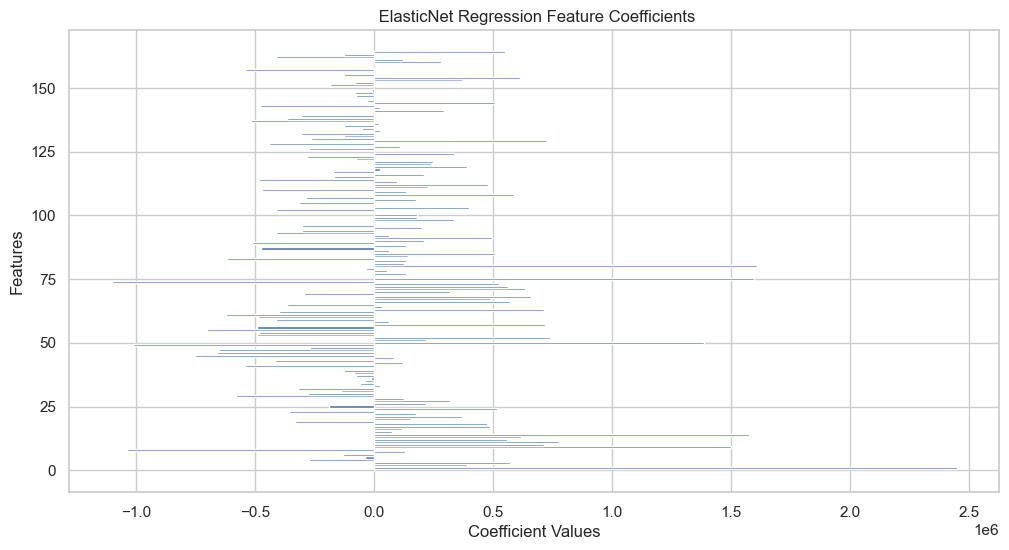

In [66]:
coefficients = best.named_steps['en'].coef_.reshape(-1)
coefficients.shape
feature_names = list(np.linspace(0, 164, 165))
print(coefficients)
print(feature_names)
# Plotting
plt.figure(figsize=(12, 6))
plt.barh(feature_names, coefficients)  
plt.xlabel('Coefficient Values')
plt.ylabel('Features')
plt.title(' ElasticNet Regression Feature Coefficients')
plt.show()

# 4. Insights and key findings


## Insights from Modelling

- All Lasso, Ridge, ElasticNet Regression techniqes gave us better result than simple Linear Regression
- The Lowest time to do hyperparameter Tuning was taken by L2 Ridge Regression.
- We can observe it was Lasso Regression that made more coefficients 0 than any other form of Regularization.
- Coefficients decrease as we increase alpha, hence coefficients of Lasso, Ridge, Elasticnet are lower in magnitude than that of simple Linear Regression Model.

## key Findings

- Number of Bedrooms play major role in deciding price of a House

# 5. Next Steps


- Accuracy could be Increased by using wider range of Hyperparameters for hyperparameter tuning.
- Accuracy could be Increased in future by use of more efficient model algorithms for modelling such as RandomForest Regression and Support Vector Regression.
- We can explore advanced model interpretability techniques, such as SHAP (SHapley Additive exPlanations) values or Partial Dependence Plots, to gain deeper insights into how specific features influence the model's predictions.
- We can try different other features as target column for different other types of predictions.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
